# Fig.3 - Comparisons of MDR's AUC across 12 different sets

In [1]:
plot_savepath = 'generated_figures/Fig3_AUC_IQR_with_importation_every5yr'

Change plot's default size and font

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

In [3]:
from constant import HEADER_NAME, COLUMNS_TO_DROP
import pandas as pd
import numpy as np
import scipy
from scipy.stats import mannwhitneyu

In [4]:
TITLE_FONTSIZE = 20
XLABEL_FONTSIZE = 20
YLABEL_PADDING = 190

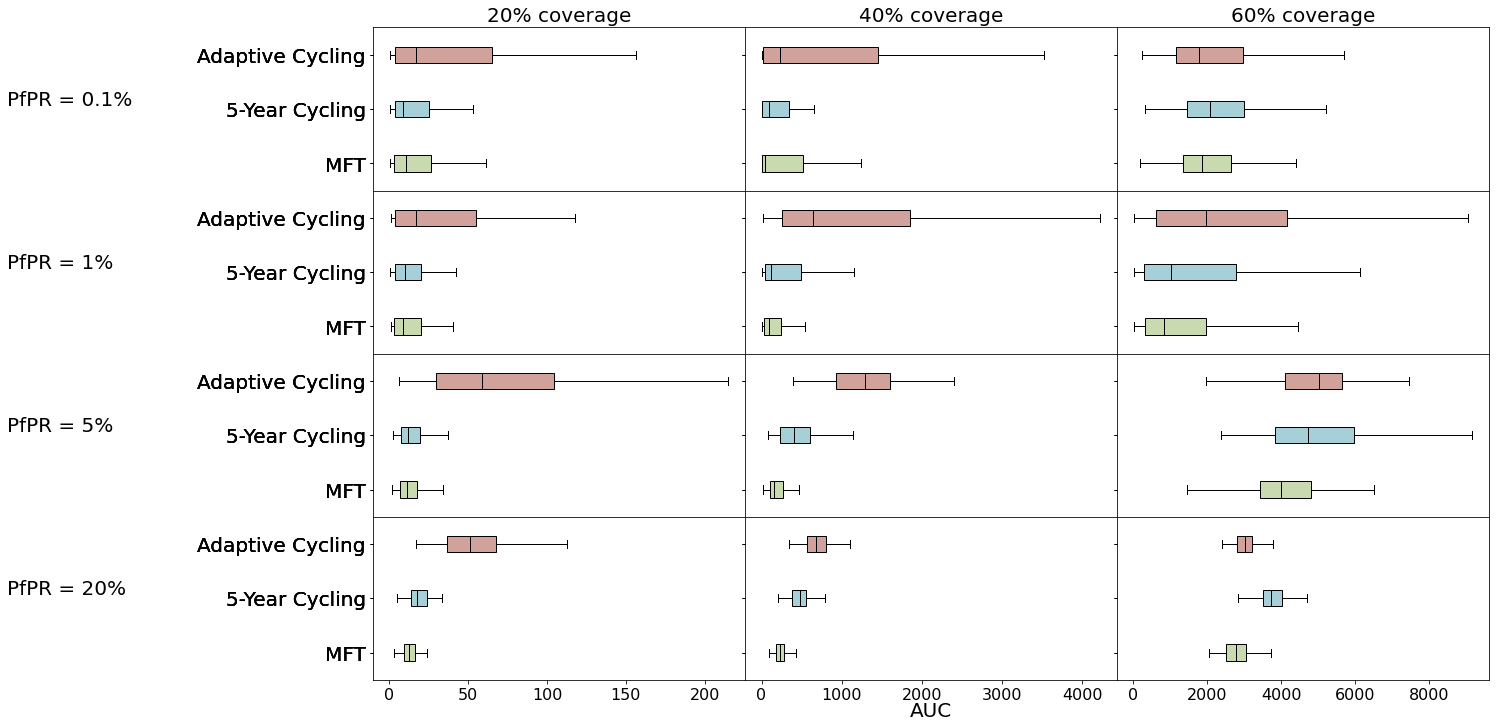

In [5]:
fig, axes = plt.subplots(4, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')

# fig.suptitle('PfPR = 0.1%', y=0.93, fontweight='bold', fontsize=TITLE_FONTSIZE)
# plot IQR of AUC for most-dangerous-triple and -double
from plotter import fig3_dangerous_five_combined_AUC_IQR

all_data_0p1p = []
# pfpr 0.1%
for (a,b,idx) in zip([1,5,9],[20,40,60],[0,1,2]): # set#, coverage, index#
  file_path_cyc = 'raw_data/with_importation_every_5_year/set%s_c/monthly/set%sci_' % (a,a) +'%smonthly_data_0.txt'
  file_path_mft = 'raw_data/with_importation_every_5_year/set%s_m/monthly/set%smi_' % (a,a) + '%smonthly_data_0.txt'
  file_path_adpcyc = 'raw_data/with_importation_every_5_year/set%s_ac/monthly/set%saci_' % (a,a) + '%smonthly_data_0.txt'
  
  dflist_cyc = []
  dflist_mft = []
  dflist_adpcyc = []
  for i in range(1,101):
    dflist_cyc.append(pd.read_csv(file_path_cyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_mft.append(pd.read_csv(file_path_mft % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_adpcyc.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
  
  axes[0][idx].set_title('%s%% coverage' % b, fontsize=XLABEL_FONTSIZE)
  temp = fig3_dangerous_five_combined_AUC_IQR(ax=axes[0][idx], m=dflist_mft, c=dflist_cyc, a=dflist_adpcyc)
  all_data_0p1p.append(temp)

all_data_1p = []
# pfpr 1%
for (a,idx) in zip([2,6,10],[0,1,2]):
  file_path_cyc = 'raw_data/with_importation_every_5_year/set%s_c/monthly/set%sci_' % (a,a) +'%smonthly_data_0.txt'
  file_path_mft = 'raw_data/with_importation_every_5_year/set%s_m/monthly/set%smi_' % (a,a) + '%smonthly_data_0.txt'
  file_path_adpcyc = 'raw_data/with_importation_every_5_year/set%s_ac/monthly/set%saci_' % (a,a) + '%smonthly_data_0.txt'
  
  dflist_cyc = []
  dflist_mft = []
  dflist_adpcyc = []
  for i in range(1,101):
    dflist_cyc.append(pd.read_csv(file_path_cyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_mft.append(pd.read_csv(file_path_mft % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_adpcyc.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
  temp = fig3_dangerous_five_combined_AUC_IQR(ax=axes[1][idx], m=dflist_mft, c=dflist_cyc, a=dflist_adpcyc)
  all_data_1p.append(temp)

all_data_5p = []
# pfpr 5%
for (a,idx) in zip([3,7,11],[0,1,2]):
  file_path_cyc = 'raw_data/with_importation_every_5_year/set%s_c/monthly/set%sci_' % (a,a) +'%smonthly_data_0.txt'
  file_path_mft = 'raw_data/with_importation_every_5_year/set%s_m/monthly/set%smi_' % (a,a) + '%smonthly_data_0.txt'
  file_path_adpcyc = 'raw_data/with_importation_every_5_year/set%s_ac/monthly/set%saci_' % (a,a) + '%smonthly_data_0.txt'
  
  dflist_cyc = []
  dflist_mft = []
  dflist_adpcyc = []
  for i in range(1,101):
    dflist_cyc.append(pd.read_csv(file_path_cyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_mft.append(pd.read_csv(file_path_mft % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_adpcyc.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
  temp = fig3_dangerous_five_combined_AUC_IQR(ax=axes[2][idx], m=dflist_mft, c=dflist_cyc, a=dflist_adpcyc)
  all_data_5p.append(temp)

all_data_20p = []
# pfpr 20%
for (a,idx) in zip([4,8,12],[0,1,2]):
  file_path_cyc = 'raw_data/with_importation_every_5_year/set%s_c/monthly/set%sci_' % (a,a) +'%smonthly_data_0.txt'
  file_path_mft = 'raw_data/with_importation_every_5_year/set%s_m/monthly/set%smi_' % (a,a) + '%smonthly_data_0.txt'
  file_path_adpcyc = 'raw_data/with_importation_every_5_year/set%s_ac/monthly/set%saci_' % (a,a) + '%smonthly_data_0.txt'
  
  dflist_cyc = []
  dflist_mft = []
  dflist_adpcyc = []
  for i in range(1,101):
    dflist_cyc.append(pd.read_csv(file_path_cyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_mft.append(pd.read_csv(file_path_mft % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
    dflist_adpcyc.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                                  names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP).fillna(0))
  temp = fig3_dangerous_five_combined_AUC_IQR(ax=axes[3][idx], m=dflist_mft, c=dflist_cyc, a=dflist_adpcyc)
  all_data_20p.append(temp)
  
for c in range(4):
  for tick in axes[c][0].yaxis.get_major_ticks():
    tick.label.set_fontsize(XLABEL_FONTSIZE)

axes[0][0].set_ylabel('PfPR = 0.1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[1][0].set_ylabel('PfPR = 1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[2][0].set_ylabel('PfPR = 5%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[3][0].set_ylabel('PfPR = 20%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)

for c in range(3):
  for tick in axes[3][c].xaxis.get_major_ticks():
    tick.label.set_fontsize(XLABEL_FONTSIZE-4)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# add common x- and y-labels
plt.xlabel('AUC', fontsize=XLABEL_FONTSIZE)

plt.savefig(fname=plot_savepath+'.svg', format='svg')

Output AUC and Mann-Whitney p-value in these 12 scenarios

In [6]:
def helper_print_auc_values(onecov_data, cov_text):
  m, c, a = onecov_data
  
  _, p_m_vs_c = mannwhitneyu(m, c)
  _, p_m_vs_a = mannwhitneyu(m, a)
  print(f'** MFT vs 5-yr-Cyc Mann-Whitney p-value: {p_m_vs_c} **')
  print(f'** MFT vs Adpt-Cyc Mann-Whitney p-value: {p_m_vs_a} **')
  
  Ql_m = np.percentile(m, 25, interpolation = 'midpoint')
  Qm_m = np.percentile(m, 50, interpolation = 'midpoint')
  Qu_m = np.percentile(m, 75, interpolation = 'midpoint')
  Ql_c = np.percentile(c, 25, interpolation = 'midpoint')
  Qm_c = np.percentile(c, 50, interpolation = 'midpoint')
  Qu_c = np.percentile(c, 75, interpolation = 'midpoint')
  Ql_a = np.percentile(a, 25, interpolation = 'midpoint')
  Qm_a = np.percentile(a, 50, interpolation = 'midpoint')
  Qu_a = np.percentile(a, 75, interpolation = 'midpoint')
  
  print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format('5-Y Cyc', Qm_c, Ql_c, Qu_c))
  print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format('Adp Cyc', Qm_a, Ql_a, Qu_a))
  print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format('MFT', Qm_m, Ql_m, Qu_m))

In [7]:
# param: all_data
#        size 3 for 20/40/60 coverage settings
def print_auc_values(all_data, pfpr_text):
  print(f'---PfPR = {pfpr_text}%---')
  cov20, cov40, cov60 = all_data
  for onecov,covtext in zip(all_data,['20','40','60']):
    print(f'  {covtext}% coverage:')
    helper_print_auc_values(onecov,covtext)
  print('--------------------------------')

In [8]:
print_auc_values(all_data_0p1p, '0.1')

---PfPR = 0.1%---
  20% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.19319535669995086 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.053811277821494245 **
5-Y Cyc    =    9.05 (   3.49-  25.65)
Adp Cyc    =   17.27 (   3.91-  68.04)
MFT        =   10.51 (   3.31-  26.74)
  40% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.46932499808902756 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.0018280039590014906 **
5-Y Cyc    =   87.00 (   9.70- 343.38)
Adp Cyc    =  231.98 (  19.48-1485.48)
MFT        =   45.56 (   8.89- 520.46)
  60% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.10172486788848462 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.3954632500971143 **
5-Y Cyc    = 2077.05 (1436.28-2983.77)
Adp Cyc    = 1771.11 (1164.76-2990.64)
MFT        = 1853.58 (1324.67-2647.60)
--------------------------------


In [9]:
print_auc_values(all_data_1p, '1')

---PfPR = 1%---
  20% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.4712691323268728 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.00239451263116965 **
5-Y Cyc    =    9.81 (   3.47-  20.47)
Adp Cyc    =   16.97 (   3.98-  58.62)
MFT        =    8.53 (   3.29-  20.66)
  40% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.057655448555006365 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 2.589026817389075e-15 **
5-Y Cyc    =  115.87 (  40.38- 509.11)
Adp Cyc    =  647.33 ( 247.99-1850.69)
MFT        =   93.60 (  32.26- 246.08)
  60% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.13129429061541048 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 0.00025474130199619835 **
5-Y Cyc    = 1028.56 ( 284.16-2824.40)
Adp Cyc    = 1977.63 ( 595.09-4159.98)
MFT        =  830.28 ( 314.97-1980.95)
--------------------------------


In [10]:
print_auc_values(all_data_5p, '5')

---PfPR = 5%---
  20% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 0.2284346330564342 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 1.3079389560998283e-24 **
5-Y Cyc    =   11.95 (   7.44-  19.49)
Adp Cyc    =   58.86 (  29.51- 105.83)
MFT        =   11.05 (   6.55-  17.87)
  40% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 1.2240084352629263e-14 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 1.350092582338263e-33 **
5-Y Cyc    =  399.12 ( 235.78- 616.82)
Adp Cyc    = 1293.07 ( 918.10-1608.94)
MFT        =  154.41 ( 103.46- 262.31)
  60% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 8.278135457212109e-05 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 4.184511755674074e-06 **
5-Y Cyc    = 4735.75 (3821.47-6001.47)
Adp Cyc    = 5039.64 (4079.94-5653.22)
MFT        = 3997.17 (3416.23-4824.70)
--------------------------------


In [11]:
print_auc_values(all_data_20p, '20')

---PfPR = 20%---
  20% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 3.0488903519550167e-10 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 1.1644115843358873e-33 **
5-Y Cyc    =   17.87 (  14.08-  23.83)
Adp Cyc    =   51.33 (  36.71-  68.27)
MFT        =   12.45 (   9.34-  16.14)
  40% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 4.44482802231299e-31 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 2.4044906555325176e-34 **
5-Y Cyc    =  484.87 ( 378.55- 551.61)
Adp Cyc    =  682.20 ( 567.22- 805.75)
MFT        =  232.32 ( 185.13- 283.77)
  60% coverage:
** MFT vs 5-yr-Cyc Mann-Whitney p-value: 1.8406880632719793e-29 **
** MFT vs Adpt-Cyc Mann-Whitney p-value: 1.1271467820388846e-06 **
5-Y Cyc    = 3716.75 (3512.88-4035.84)
Adp Cyc    = 3015.62 (2803.60-3208.68)
MFT        = 2779.69 (2516.95-3057.13)
--------------------------------
